In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [3]:
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [4]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

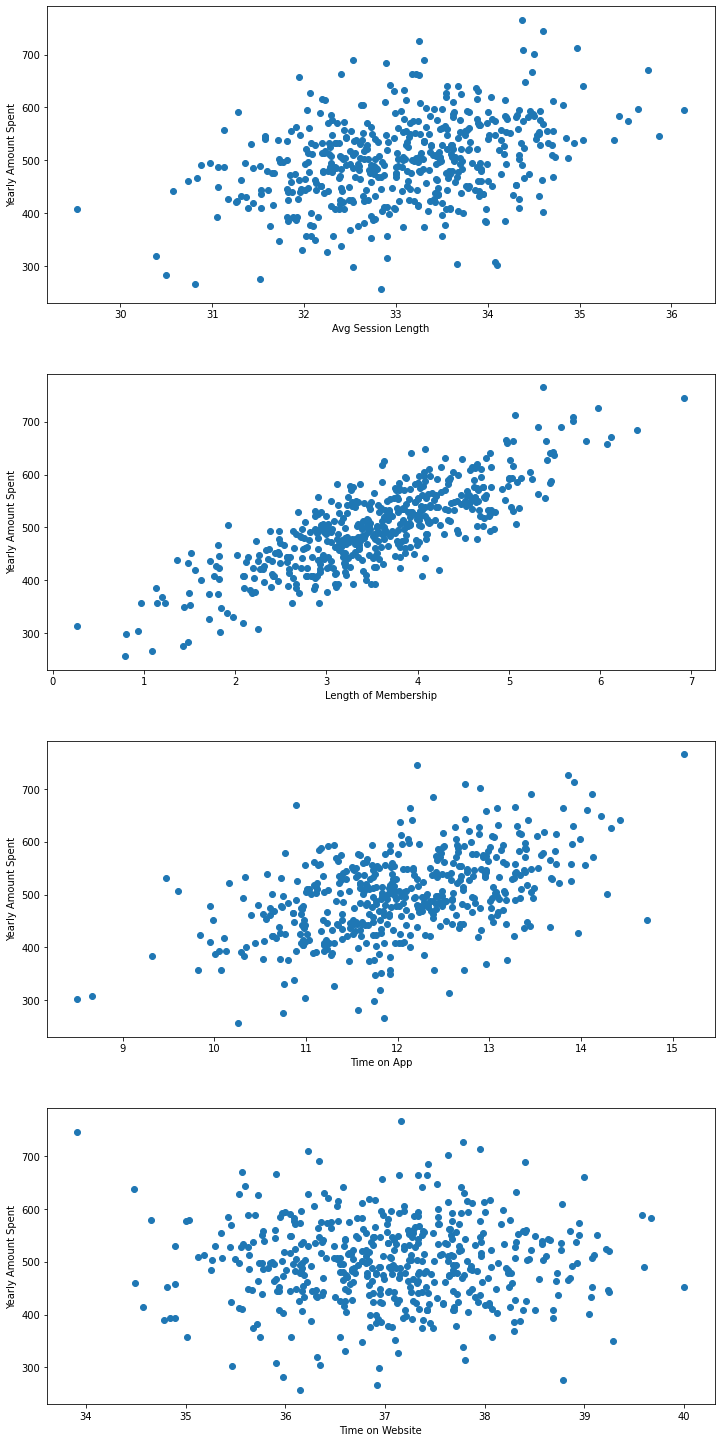

In [9]:
X = df[df.columns.difference(['Yearly Amount Spent'])]
y = df['Yearly Amount Spent']
fig, axis = plt.subplots(4, 1)
fig.set_figwidth(10)
fig.set_figheight(20)
fig.tight_layout(h_pad = 5)

for i, feature in enumerate(X.columns.tolist()):
    axis[i].scatter(df[feature], y)
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [6]:
df.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [10]:
X = df[['Length of Membership']]
y = df['Yearly Amount Spent']

In [12]:
X.head()

,Length of Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308


In [13]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

### Divide the dataset into training and test sets with the ratio 80:20.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [15]:
X_train

,Length of Membership
369,5.047023
364,3.525806
355,2.627625
114,5.485977
319,4.069917
...,...
289,1.810080
109,3.318822
395,3.420150
480,4.183144


In [16]:
X_test

,Length of Membership
331,3.689917
374,4.238296
434,0.936498
354,3.481062
345,3.537124
...,...
115,2.594190
102,2.586968
65,5.377594
87,3.366464


In [17]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    
    data_vector['ones'] = 1
    data_vector = data_vector[['ones','Length of Membership']]
    
 
    beta = np.linalg.inv(data_vector.T.dot(data_vector)).dot(data_vector.T).dot(response_vector)
    
    return beta

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [20]:
def plot_fitted_line(b0,
                     b1,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    a = plt.scatter(x,y,color='k')
    b = plt.plot(x,b0 + b1 * x,color='b',lw=4)
    plt.title('Regression line Length of Membership VS Yearly Amount Spent')
    plt.xlabel("Length of Membership")
    plt.ylabel("Yearly Amount Spent")
    plt.show()
    #plt.savefig('%s.png' % username)

In [19]:
b0,b1 = fit_1d_linear_regression(X_train, y_train)
b0,b1

     ones  Length of Membership
369     1              5.047023
364     1              3.525806
355     1              2.627625
114     1              5.485977
319     1              4.069917
..    ...                   ...
289     1              1.810080
109     1              3.318822
395     1              3.420150
480     1              4.183144
176     1              4.773503

[400 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(278.9636918966848, 62.384662963779014)

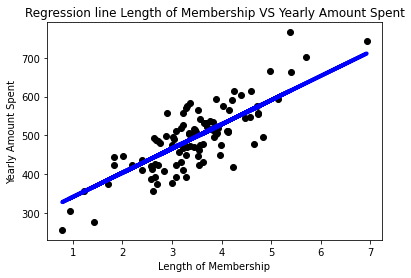

In [21]:
plot_fitted_line(b0, b1, X_test, y_test, 'Your_Name')

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [22]:
X_train

,Length of Membership,ones
369,5.047023,1
364,3.525806,1
355,2.627625,1
114,5.485977,1
319,4.069917,1
...,...,...
289,1.810080,1
109,3.318822,1
395,3.420150,1
480,4.183144,1


278.9636918966854 [62.38466296]


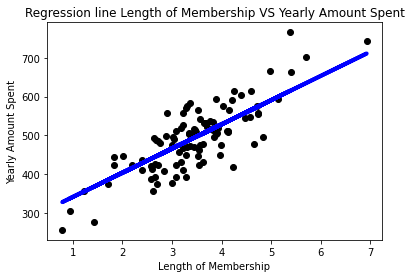

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['Length of Membership']], y_train)
b0_s, b1_s = model.intercept_, model.coef_

print(b0_s, b1_s)
plot_fitted_line(b0_s, b1_s, X_test, y_test, 'Your_Name')

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_sklearn = model.predict(X_test.values.reshape(-1,1))
y_pred_custom = b0 + b1 * X_test


print('MAE cusom: ', mean_absolute_error(y_test, y_pred_custom))
print('MAE sklearn: ', mean_absolute_error(y_test, y_pred_sklearn),'\n')


print('MSE cusom: ', mean_squared_error(y_test, y_pred_custom))
print('MSE sklearn: ', mean_squared_error(y_test, y_pred_sklearn),'\n')


print('RMSE cusom: ', np.sqrt(mean_squared_error(y_test, y_pred_custom)))
print('RMSE sklearn: ', np.sqrt(mean_squared_error(y_test, y_pred_sklearn)),'\n'"")

print('R2 cusom: ', r2_score(y_test, y_pred_custom))
print('R2 sklearn: ', r2_score(y_test, y_pred_sklearn))

MAE cusom:  41.65976781142993
MAE sklearn:  41.65976781142993 

MSE cusom:  2603.36500614212
MSE sklearn:  2603.3650061421213 

RMSE cusom:  51.023181066473306
RMSE sklearn:  51.02318106647332 

R2 cusom:  0.6513287966850423
R2 sklearn:  0.6513287966850421


In [26]:
df['Yearly Amount Spent'].min(), df['Yearly Amount Spent'].max()

(256.67058229005585, 765.5184619388373)

### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [27]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [89]:
model = LinearRegression()

X = df[df.columns.difference(['Yearly Amount Spent'])]
y = df['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('MAE: ', mean_absolute_error(y_test, y_pred))

print('MSE: ', mean_squared_error(y_test, y_pred))

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

print('R-squared: ', r2_score(y_test, y_pred)) 

MAE:  8.57510137655429
MSE:  111.06329597249953
RMSE:  10.538657218664033
R-squared:  0.9819676748095942
